Імпортуємо усі необхідні пакети.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Завантажуємо дані

In [2]:
dataset = pd.read_csv("1895-2022.csv")
dataset.head()

,Date,Value,Anomaly
0,189501,17.6,-2.5
1,189601,17.2,-2.9
2,189701,19.3,-0.8
3,189801,20.8,0.7
4,189901,19.2,-0.9


Змінюємо назву стовпців для використання

In [3]:
dataset.columns = ['Date', 'Temperature', 'Anomaly']
dataset

,Date,Temperature,Anomaly
0,189501,17.6,-2.5
1,189601,17.2,-2.9
2,189701,19.3,-0.8
3,189801,20.8,0.7
4,189901,19.2,-0.9
...,...,...,...
123,201801,19.1,-1.0
124,201901,19.4,-0.7
125,202001,27.7,7.6
126,202101,24.0,3.9


Перевіряємо тип колонки Date

In [4]:
dataset.Date.dtype

dtype('int64')

Видалимо місяць із поля Date

In [5]:
dataset.Date = dataset.Date.floordiv(100)
dataset

,Date,Temperature,Anomaly
0,1895,17.6,-2.5
1,1896,17.2,-2.9
2,1897,19.3,-0.8
3,1898,20.8,0.7
4,1899,19.2,-0.9
...,...,...,...
123,2018,19.1,-1.0
124,2019,19.4,-0.7
125,2020,27.7,7.6
126,2021,24.0,3.9


Побудуємо представлення даних DataFrame у вигляді регресійної прямої

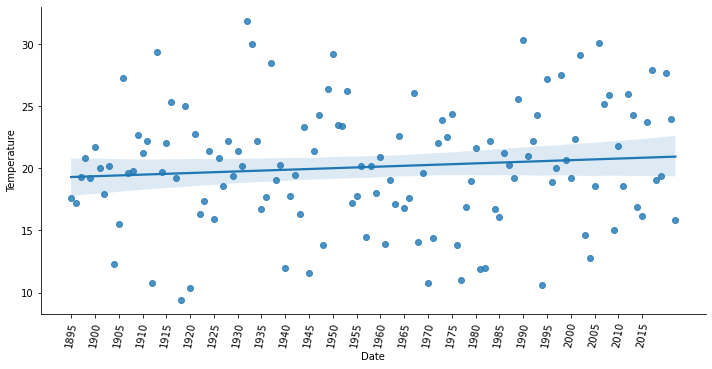

In [6]:
sns.lmplot(x="Date", y="Temperature", data=dataset, aspect=2)
plt.xticks(range(1895, 2018, 5), rotation=80)
plt.show()

Спрогнозуємо дані темперратури на 2019, 2020, 2021 та 2022 рік.

In [7]:
linear_regression = stats.linregress(x = dataset.Date, y = dataset.Temperature)
predictions = [(linear_regression.slope * x + linear_regression.intercept) for x in range(2019, 2023)]
for i, year in zip(predictions, range(2019,2023)):
    print(f'Прогнозована температура в {year} році: {i}')

Прогнозована температура в 2019 році: 20.90263172953671
Прогнозована температура в 2020 році: 20.91556262589269
Прогнозована температура в 2021 році: 20.92849352224867
Прогнозована температура в 2022 році: 20.941424418604647


Отримаємо можливі значення температури на січень 1886 року

In [8]:
prediction = linear_regression.slope * 1886 + linear_regression.intercept
print(f'Можливе значення температури в 1886 році: {prediction}')

Можливе значення температури в 1886 році: 19.182822514191535


Виконаємо виведення усіх точок даних та також виконаємо маштабування

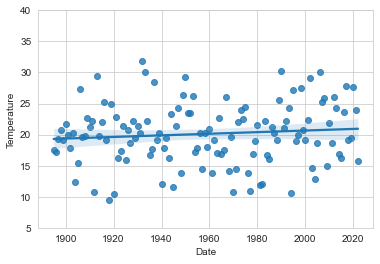

In [9]:
plt.clf()
sns.set_style('whitegrid')
axes = sns.regplot(x='Date', y='Temperature', data=dataset)
axes.set_ylim(5, 40)
plt.show()